
# Assignment 1








# Problem 1.a




In [3]:
from nltk.corpus import brown
import nltk

cfd = nltk.ConditionalFreqDist(
           (genre, word.lower())
           for genre in brown.categories()
           for word in brown.words(categories=genre))


genres = ['news', 'religion', 'hobbies', 'science_fiction', 'romance', 'humor']
modals = ["he", "she", "her", "him"]

cfd.tabulate(conditions=genres, samples=modals)





                  he  she  her  him 
           news  642   77  121   93 
       religion  206   12    8   94 
        hobbies  196   29   17   49 
science_fiction  191   59   82   58 
        romance 1068  728  680  340 
          humor  195   81   68   48 


# Problem 1.b

we se that he is used much more frequent then she in all genres. One cathegory where she is used the most is in romance but even then he occures 1068 times compared to she.

Him is also used more in all genres compared to her except "her" is used 680 times in romance compared to him.

He is used more then him while her is used more then she.

# Problem 1.c

In [2]:
from nltk.corpus import brown
import nltk

gender=["Male","Female"]
male_pron = ["he", "him"]
female_pron=["she","her"]

cfdist = nltk.ConditionalFreqDist()
for k in(gender):
    for word in brown.words():
        word=word.lower()
    
        if k=="Male" and word in  male_pron:
            cfdist[k][word] += 1
        elif k=="Female" and word in  female_pron: 
            
                cfdist[k][word] += 1

                
cfdist.tabulate(conditions=gender)   



         he  her  him  she 
  Male 9548    0 2619    0 
Female    0 3036    0 2860 


|       | Nominative      | objecttive  | 
|-------| -----------     | ----------- |
| Female|     2860        | 16          |
|  Male |    9546         | 37          |

In [3]:
relative_freq_her=3036/(3036+2860)
print(f"relative freq for her {relative_freq_her}")
relative_freq_him=2619/(9548+2619)
print(f"relative freq for him {relative_freq_him}")

relative freq for her 0.5149253731343284
relative freq for him 0.21525437659242214


# 1.d   


In [4]:
cathegory=["det","pron"]
pron = ["she","he","her", "him","hers","his","hers"]


cfd = nltk.ConditionalFreqDist()
a=nltk.corpus.brown.tagged_words(tagset='universal')
alower = [(x.lower(), y.lower()) for x,y in a]


for k in(cathegory):
    for word in alower:
        
        
        if  k=="det" and (word[0] in  pron) and (word[1]=="det") :
            cfd[k][word[0]] += 1
            
        elif k=="pron" and (word[0] in  pron) and (word[1]=="pron"): 
            
                cfd[k][word[0]] += 1
                
cfd.tabulate(conditions=cathegory)                 

       he  her hers  him  his  she 
 det    0 1929    0    0 6957    0 
pron 9546 1107   16 2619   37 2860 


|                   |  Possessive pronoun      | Personal pronoun        | 
|-------            | -----------              | -----------             |
| she,he,her,him    |     1929                 | 16587                   |
|  her,his,hers     |    8886                  | 1160                    |

# 1.e

Feminine personal pronoun in nomitative form accure 2860/(1107+16+2860)=0.718 or 71,8 % of the time.While in objective form 16/(1107+16+2860)=0.004 or 0.4% .  


Male personal pronoun in nomitative form accure  9546/(9546+2619+37)=0.782 or 78,2% of the time . While in objective form 2619/(9546+2619+37)=0.214 or 21.4%.

# 1.f

       he  her hers  him  his  she 
 det    0 1929    0    0 6957    0 
pron 9546 1107   16 2619   37 2860 


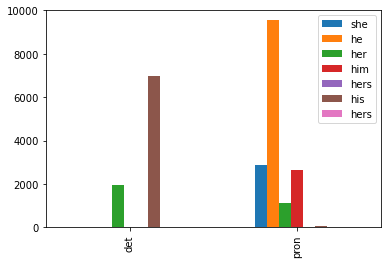

In [3]:

import pandas as pd
counts = {}
for cat in cathegory:
    counts[cat] = [cfd[cat][word] for word in pron]
df = pd.DataFrame(list(counts.values()), counts.keys(), pron)
df.plot(kind='bar')

# 1.g

The Brown corpus is from 1961. At that time men where a lot more in focus in the literature.One saw that in romance the female pronoun accured a lot more times compared to the other cathegories.

One can see that there is a different distribution between nominative 
and objective forms for the masculine and the feminine pronouns. The personal pronoun in nominative form has a almost equal distribution the difference lie in the objective form of the personal pronoun.Where male has 21.4% and femal has 0.4%.

Possessive pronouns show that something belongs to someone (source Google). Pocessive pronoun occure much more frequent in male then in female,which can be seen from the bar plot.This could be an indication of the difference in ownership between the genders. Looking at things from an historical perspective,men used to own a lot more things,compared to weman.In the 1960s often the man was the only source of income in most families. This is just assumptions i am making without reading the brown corpus.

Also most of the literature was written though the lence of the male. A common sentence which one will find in a lot of text,generelly speaking is (1)"his wife" or (2)"her husband".If bought phrases do accure in the brown corpus then the chance of (1) occuring more often then (2) is probably higher then the other way around.

Baisng my assumptions of the frequencies calculated from the brown corpus.




# 2.a,b,c


# c 

I removed the introduction of the book.Discription about the auturs ,the table of content ect....  . I also removed the last part right after the conclution.

I decided to casefold sence i saw that in the problem is interested in the frequencies of words.

I do explain in the code what i do.

In [36]:

import numpy as np    
import string      
import urllib.request
import nltk as n
from nltk import tokenize
import re


string
# open a connection to a URL 
webUrl = urllib.request.urlopen(
    "https://www.gutenberg.org/files/74/74-0.txt"
)



# read the data from the URL and print it
data = webUrl.read().decode("utf-8")


def find_n(sett, point, n):
    start = sett.find(point)
    while start >= 0 and n > 1:
        start = sett.find(point, start+1)
        n -= 1
    return start

#print(find_n(data, "END OF THE PROJECT GUTENBERG EBOOK", 1))

#using only the book not the rest 
data=data[8003:402280]
#print(data)

data = data.split("\n ")
#print(data)
new_data=[]

#tokenizing
data = [s.lower() for p in data
            for s in n.word_tokenize(p) ]

#getting rid of puntuations
for word in data:
    if word in string.punctuation:
       continue 
    if (word in "”“’* _- —"):
        
        
        continue
    else:    
        new_data.append(word)

#print(new_data)
            
        
        
#still their are puntuations,but not seperated by tokenizer puntations in the beginning 
#and end of words in new_data,using ascii delte these. Replacing all the punctions with None.
mydict={}
for i in range(32,65):
    mydict[i]=None

for i in range(91,97):
    mydict[i]=None    

for i in range(123,256):
    mydict[i]=None    
    


new_data_nr2=[]
for word in new_data:
    new_data_nr2.append(str(word.translate(mydict)))
    

#print(new_data_nr2)
    

    

In [43]:
#still not rid of one of the puntuations,using this to split words that are combined by multiple words where "—" 
#is in the middle of them special puntiation,previous comandes did not take them away. 
punctuation="—"
l=[]
for word in new_data_nr2:
    if any(x.isalpha() for x in word ) and (x in punctuation for x in word):
        for c in word:
            if c in punctuation:
                word=word.split(c)
                   
                break
        
        l.append(word)

#print(l)

#Now i have a list with mostly words but still scince i used split their are some list in thier.
#Using this function to solve that.
def flat_listt(_list):
    flat_list = []
    # Iterate through the outer list
    for element in _list:
        if type(element) is list:
            # If the element is of type list, iterate through the sublist
            for item in element:
                flat_list.append(item)
        else:
            flat_list.append(element)
    return flat_list        
        
l=flat_listt(l)

#print(l)
        


# 2.d

20 most frequent words in a table

In [44]:
from collections import Counter
import pandas as pd
Freq=nltk.FreqDist(l)
#print(Freq)
Freq1=Counter(Freq)    
    
Freq1=Freq1.most_common(20)    

df = pd.DataFrame(Freq1, columns =['word', 'Freq'])

print(df)   




    

    word  Freq
0    the  3702
1    and  3087
2      a  1830
3     to  1711
4     of  1434
5     it  1315
6     he  1252
7    was  1168
8   that  1026
9      i  1015
10    in   941
11   you   893
12     s   844
13   his   815
14   tom   773
15     t   678
16  with   647
17  they   617
18   but   581
19   for   525


# 2.e

In [45]:
Freq=nltk.FreqDist(l)
Freq=Counter(Freq)    
    
Freq=Freq.most_common(len(l))
print(type(Freq))
dict_1=dict(Freq)
freq=nltk.FreqDist()


Cathegory=["1","2-10","11-50","51-100","100+"]
for key in dict_1:
    if dict_1[key]==1:
        freq[Cathegory[0]]+=1
    if dict_1[key]>=2 and dict_1[key]<=10:
        freq[Cathegory[1]]+=1
    if dict_1[key]>=11 and dict_1[key]<=50:
        freq[Cathegory[2]]+=1    
    if dict_1[key]>=51 and dict_1[key]<=100:
        freq[Cathegory[3]]+=1 
    if dict_1[key]>=100 :
        freq[Cathegory[4]]+=1     
        
freq.tabulate(conditions=Cathegory)
        





<class 'list'>
     1   2-10  11-50   100+ 51-100 
  3668   2986    489    111     83 


# 2.f



In [40]:
import matplotlib.pyplot as plt
Freq=nltk.FreqDist(l)

Freq1=Counter(Freq)    
    
Freq1=Freq1.most_common(len(l)) 

df = pd.DataFrame(Freq1, columns =['word', 'Freq'])

freq_num=np.asarray(df.iloc[:,1])

Zipf=np.zeros(len(freq_num))

rank=np.zeros(len(freq_num))
for n in range(0,len(freq_num)):

    Zipf[n]=(n+1)*freq_num[n]
    rank[n]=(n+1)

Zipf=pd.DataFrame(Zipf, columns =["Zipf"])



frames = [df,Zipf]
result = pd.concat(frames, axis=1, ignore_index=True)


result.columns = ['word', 'freq', 'Zipf']



One can see from the table under that Zipf=n*r is not constant.Zipf law is doing well

In [41]:
Zipf=pd.DataFrame(Zipf, columns =["Zipf"])



frames = [df,Zipf]
result = pd.concat(frames, axis=1, ignore_index=True)


result.columns = ['word', 'freq', 'Zipf']

print(result[0:20])

    word  freq     Zipf
0    the  3702   3702.0
1    and  3087   6174.0
2      a  1830   5490.0
3     to  1711   6844.0
4     of  1434   7170.0
5     it  1315   7890.0
6     he  1252   8764.0
7    was  1168   9344.0
8   that  1026   9234.0
9      i  1015  10150.0
10    in   941  10351.0
11   you   893  10716.0
12     s   844  10972.0
13   his   815  11410.0
14   tom   773  11595.0
15     t   678  10848.0
16  with   647  10999.0
17  they   617  11106.0
18   but   581  11039.0
19   for   525  10500.0


# 2.g

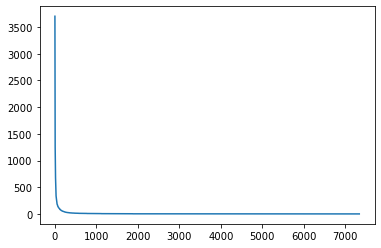

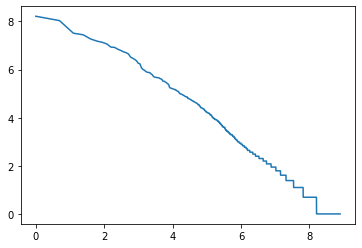

In [42]:
plt.plot(rank,freq_num)
plt.show()
plt.plot(np.log(rank),np.log(freq_num))
plt.show()

# Part B

# 1.a

Following the steps

In [19]:
import nltk
import random
import numpy as np
import scipy as sp
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

In [20]:
from nltk.corpus import movie_reviews






raw_movie_docs = [(movie_reviews.raw(fileid), category) for
category in movie_reviews.categories() for fileid in
movie_reviews.fileids(category)]



#raw_movie_docs.target[:10]
#print(movie_reviews.raw(movie_reviews.fileids(movie_reviews.categories())[5]))


random.seed(2920)
random.shuffle(raw_movie_docs)
movie_test = raw_movie_docs[:200]
movie_dev = raw_movie_docs[200:]

train_data= movie_dev[200:]
test_data_dev=movie_dev[:200]

dict_train=dict(train_data)
dict_test=dict(test_data_dev)

train_data_target=list(dict_train.values())
train_data_text=list(dict_train.keys())

test_data_dev_target=list(dict_test.values())
test_data_dev_text=list(dict_test.keys())



#print(test_data_dev_text)






In [21]:
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer()
v.fit(train_data_text)



train_vectors = v.transform(train_data_text)


dev_test_vectors = v.transform(test_data_dev_text)

clf = MultinomialNB()
clf.fit(train_vectors, train_data_target)

clf_pred=clf.predict(dev_test_vectors)

from sklearn import metrics
print(metrics.accuracy_score(test_data_dev_target,clf_pred))


0.8


# 1.b

creating a table variyng the parameters of CountVectorizer

In [22]:
booll=[True,False]
n_gram=[(1,1),(1,2),(1,3)]
store=np.zeros((2, 3))
for i in range(len(booll)):
    
    for j in range(len(n_gram)):
        v = CountVectorizer(ngram_range=n_gram[j],binary=booll[i])
        v.fit(train_data_text)

        train_vectors = v.transform(train_data_text)
        dev_test_vectors = v.transform(test_data_dev_text)

        clf = MultinomialNB()
        clf.fit(train_vectors, train_data_target)
        

        clf.predict(dev_test_vectors)
        a=clf.score(dev_test_vectors, test_data_dev_target)
        #print(a)
        store[i][j]=a

        

        

In [23]:

import pandas as pd
df = pd.DataFrame(store,index=["binary=True","binary=False"], columns =['(1,1)', '(1,2)','(1,3)'])
print(df)


              (1,1)  (1,2)  (1,3)
binary=True    0.81  0.815  0.815
binary=False   0.80  0.805  0.780


# 2.a 

Using 9 fold crossvalidation

In [24]:

import math
import random
n=len(movie_dev)
K=9
random.seed(10)

store=np.zeros(K)

index=np.random.choice(np.repeat(np.array(range(1,10)), math.ceil(n/K)),n)
movie_dev =  raw_movie_docs[200:]

dict_dev=dict(movie_dev)


dev_target=list(dict_dev.values())
dev_text=list(dict_dev.keys())
dev_target_array= np.array(dev_target)
dev_text_array= np.array(dev_text)


for k in range(0,K):
    v = CountVectorizer(ngram_range=(1,2),binary=True)
    v.fit(dev_text_array)
    dev_vectors = v.transform(dev_text_array)
    clf = MultinomialNB()
    clf.fit(dev_vectors[index!=k+1], dev_target_array[index!=k+1])
    clf.predict(dev_vectors[index==k+1])
    a=clf.score(dev_vectors[index==k+1], dev_target_array[index==k+1])
    store[k]=a
#print(store)
    
#filter1=index != 1

#movie_dev[filter1]


In [26]:
print(f" accuracy score for all runs: {store}")

mean=np.mean(store)
print(f" mean: {mean}")

sd=np.std(store)

print(f" sd: {sd}")


 accuracy score for all runs: [0.87772926 0.91363636 0.83243243 0.84651163 0.84079602 0.88888889
 0.86931818 0.8040201  0.83589744]
 mean: 0.8565811454028012
 sd: 0.03168029172236508


# 2.b

I see an improvment for all of the parameters of CountVectorizer


In [30]:
import math
import random
n=len(movie_dev)
K=9
random.seed(10)

store1=np.zeros(K)
index=np.random.choice(np.repeat(np.array(range(1,10)), math.ceil(n/K)),n)
movie_dev =  raw_movie_docs[200:]

dict_dev=dict(movie_dev)


dev_target=list(dict_dev.values())
dev_text=list(dict_dev.keys())
dev_target_array= np.array(dev_target)
dev_text_array= np.array(dev_text)

booll=[True,False]
n_gram=[(1,1),(1,2),(1,3)]
store2=np.zeros((2, 3))
for i in range(len(booll)):
    
    for j in range(len(n_gram)):
        v = CountVectorizer(ngram_range=n_gram[j],binary=booll[i])
        
        for k in range(0,K):
           
            v.fit(dev_text_array)
            dev_vectors = v.transform(dev_text_array)
            clf = MultinomialNB()
            clf.fit(dev_vectors[index!=k+1], dev_target_array[index!=k+1])
            clf.predict(dev_vectors[index==k+1])
            a=clf.score(dev_vectors[index==k+1], dev_target_array[index==k+1])
            store1[k]=a
       

        
        mean=np.mean(store1)                            
        store2[i][j]=mean
        #print(store)
    

In [31]:
import pandas as pd
df = pd.DataFrame(store2,index=["binary=True","binary=False"], columns =['(1,1)', '(1,2)','(1,3)'])
print(df)

                 (1,1)     (1,2)     (1,3)
binary=True   0.825571  0.858470  0.848744
binary=False  0.816682  0.843359  0.848258


# 3

In [32]:
from sklearn.preprocessing import StandardScaler
import math
import random
n=len(movie_dev)
K=9
random.seed(100)

store3=np.zeros((2,K))
index=np.random.choice(np.repeat(np.array(range(1,10)), math.ceil(n/K)),n)
movie_dev =  raw_movie_docs[200:]

dict_dev=dict(movie_dev)


dev_target=list(dict_dev.values())
dev_text=list(dict_dev.keys())
dev_target_array= np.array(dev_target)
dev_text_array= np.array(dev_text)

v=[CountVectorizer(),CountVectorizer(ngram_range=(1,2),binary=True)]

booll=[True,False]

store4=np.zeros((2, 2))

    
for j in range(len(store4)):
        
        
    for k in range(0,K):
           
        v[j].fit(dev_text_array)
        dev_vectors = v[j].transform(dev_text_array)
        
        clf = LogisticRegression(solver='liblinear',max_iter=100)
        clf2= MultinomialNB()
        clf2.fit(dev_vectors[index!=k+1], dev_target_array[index!=k+1])
        clf.fit(dev_vectors[index!=k+1], dev_target_array[index!=k+1])
        
        clf.predict(dev_vectors[index==k+1])
        clf2.predict(dev_vectors[index==k+1])
        a=clf.score(dev_vectors[index==k+1], dev_target_array[index==k+1])
        b=clf2.score(dev_vectors[index==k+1], dev_target_array[index==k+1])
        store3[0][k]=a
        store3[1][k]=b
       

        
    mean1=np.mean(store3[0])
    mean2=np.mean(store3[1])
    store4[j][0]=mean1
    store4[j][1]=mean2
    
    




In [33]:
import pandas as pd
df = pd.DataFrame(store4,index=["default","best"], columns =['logistic', 'Bayes'])
print(df)

         logistic     Bayes
default  0.836596  0.815924
best     0.875418  0.850441


One can see that the Logistic regression is doing better then Naive Bayes.For bought for "default" and "best".